In [1]:
import pandas as pd
df = pd.read_csv('marketingc_clean.csv')

In [2]:
df.head()

,id,education,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,response,age,marital_status,tenure,total_spent,children,living_with,family_size,is_parent,cluster
0,5524,Graduation,58138.0,0,0,58,635,88,546,172,...,1,68,Single,13,1617,0,alone,1,0,3
1,2174,Graduation,46344.0,1,1,38,11,1,6,2,...,0,71,Single,11,27,2,alone,3,1,1
2,4141,Graduation,71613.0,0,0,26,426,49,127,111,...,0,60,Together,12,776,0,partner,2,0,3
3,6182,Graduation,26646.0,1,0,26,11,4,20,10,...,0,41,Together,11,53,1,partner,3,1,1
4,5324,PhD,58293.0,1,0,94,173,43,118,46,...,0,44,Married,11,422,1,partner,3,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   education            2240 non-null   object 
 2   income               2240 non-null   float64
 3   kidhome              2240 non-null   int64  
 4   teenhome             2240 non-null   int64  
 5   recency              2240 non-null   int64  
 6   mntwines             2240 non-null   int64  
 7   mntfruits            2240 non-null   int64  
 8   mntmeatproducts      2240 non-null   int64  
 9   mntfishproducts      2240 non-null   int64  
 10  mntsweetproducts     2240 non-null   int64  
 11  mntgoldprods         2240 non-null   int64  
 12  numdealspurchases    2240 non-null   int64  
 13  numwebpurchases      2240 non-null   int64  
 14  numcatalogpurchases  2240 non-null   int64  
 15  numstorepurchases    2240 non-null   i

In [9]:
df.columns

Index(['id', 'education', 'income', 'kidhome', 'teenhome', 'recency',
       'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response', 'age', 'marital_status', 'tenure',
       'total_spent', 'children', 'living_with', 'family_size', 'is_parent',
       'cluster'],
      dtype='object')

MACHINE LEARNING MODEL - PREDICTION FOR AMOUNT SPENT ON WINE

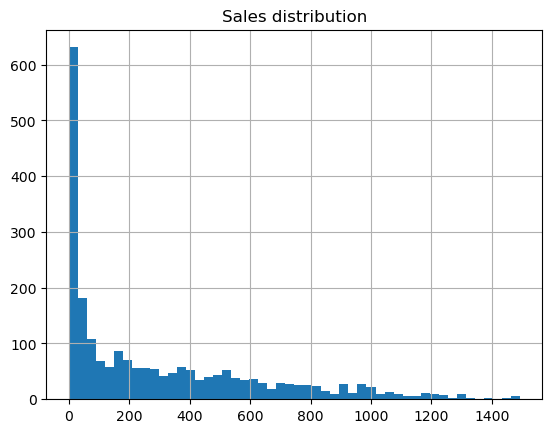

In [4]:
import matplotlib.pyplot as plt
df['mntwines'].hist(bins=50)
plt.title('Sales distribution')
plt.show()

In [5]:
df['mntwines'].isnull().sum()

0

In [7]:
df['mntwines'].notnull().sum()

2240

In [10]:
#Drop unnecessary columns
df = df.drop(columns=['id', 'kidhome', 'teenhome', 'total_spent'])

In [ ]:
dummies = pd.get_dummies(df['education'], prefix='education')
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['education'])

In [16]:
dummies = pd.get_dummies(df['marital_status'], prefix='marital_status')
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['marital_status'])

In [19]:
living_with_dummies = pd.get_dummies(df['living_with'], prefix='living_with')
df = pd.concat([df, living_with_dummies], axis=1)
df = df.drop(columns=['living_with'])

In [23]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Calculate Spearman correlations of 'mntwines' with all numeric variables
corr_with_mntwines = numeric_df.corr(method='spearman')['mntwines'].sort_values(ascending=False)

print(corr_with_mntwines)

mntwines               1.000000
income                 0.828915
mntmeatproducts        0.823652
numcatalogpurchases    0.823421
numstorepurchases      0.806918
cluster                0.756394
numwebpurchases        0.740195
mntgoldprods           0.575345
mntfishproducts        0.524609
mntfruits              0.517544
mntsweetproducts       0.505322
acceptedcmp5           0.365760
acceptedcmp4           0.310680
acceptedcmp1           0.304062
age                    0.235539
response               0.199046
tenure                 0.141504
acceptedcmp2           0.138201
numdealspurchases      0.057165
acceptedcmp3           0.034719
recency                0.018662
complain              -0.038034
family_size           -0.273382
is_parent             -0.322889
children              -0.335141
numwebvisitsmonth     -0.389039
z_costcontact               NaN
z_revenue                   NaN
Name: mntwines, dtype: float64


CREATING THE MODEL

In [ ]:
#Features and target variable

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of top correlated features with mntwines
features = [
    'income', 'mntmeatproducts', 'numcatalogpurchases', 'numstorepurchases',
    'cluster', 'numwebpurchases', 'mntgoldprods', 'mntfishproducts',
    'mntfruits', 'mntsweetproducts'
]

# Drop rows with missing values in selected features or target
df_model = df[features + ['mntwines']].dropna()

X = df_model[features]
y = df_model['mntwines']


In [25]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
#Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 44289.89
R-squared: 0.62


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (replace 'all_features' with your actual feature list)
all_features = df.select_dtypes(include=['number']).columns.drop('mntwines').tolist()

df_model = df[all_features + ['mntwines']].dropna()

X = df_model[all_features]
y = df_model['mntwines']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred):.2f}")

Random Forest MSE: 19095.84
Random Forest R2: 0.84


In [28]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"XGBoost R2: {r2_score(y_test, y_pred):.2f}")

XGBoost MSE: 22056.62
XGBoost R2: 0.81


RANDOM FOREST MODEL

In [ ]:
#Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Best CV score: 0.7780378575688017


In [31]:
#Best model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

best_params_rf = {
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': None,
    'max_depth': 20
}

final_rf = RandomForestRegressor(**best_params_rf, random_state=42)
final_rf.fit(X_train, y_train)

pred_test_rf = final_rf.predict(X_test)

print("Random Forest Test R2:", r2_score(y_test, pred_test_rf))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, pred_test_rf)))
print("Random Forest Test MAE:", mean_absolute_error(y_test, pred_test_rf))

Random Forest Test R2: 0.831148308944073
Random Forest Test RMSE: 140.68234713003105
Random Forest Test MAE: 80.64701686583172


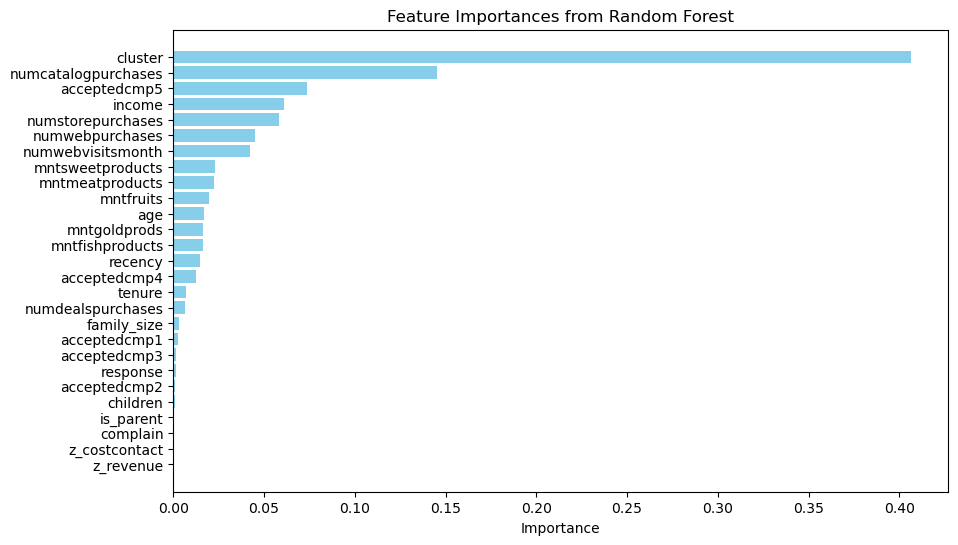

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming X_train is a DataFrame, get feature names
features = X_train.columns

importances = final_rf.feature_importances_

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.gca().invert_yaxis()  # highest importance on top
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.show()

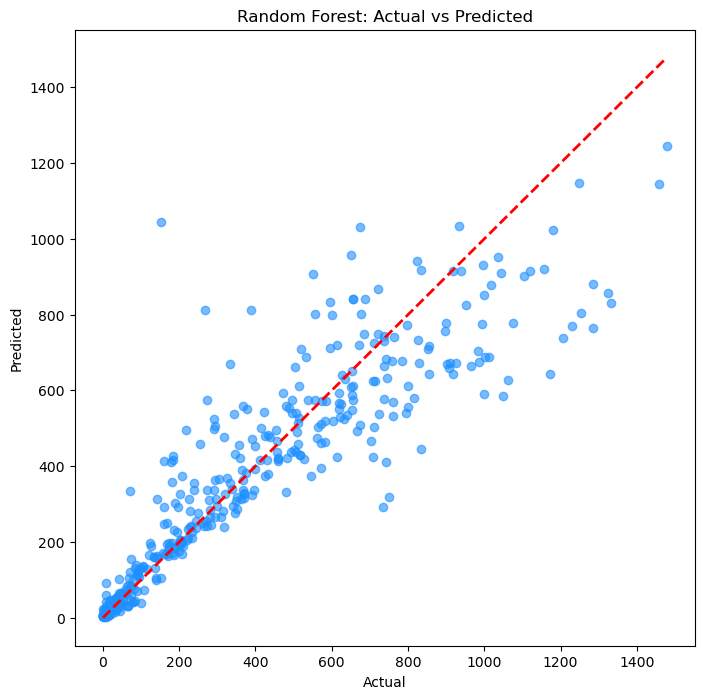

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, pred_test_rf, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [ ]:
#Could try witout the purchase variables